# First steps to learn

In this notebook, we will explore some techniques using the **Times Series KMeans** algorithm.


In [228]:
import pandas as pd
import numpy as np

In [229]:
data_folder = "../input/"

In [230]:
df_asset = pd.read_csv(data_folder + "asset_details.csv", index_col=0)
df_asset.sort_values(by=['Weight'], ascending=False)

,Weight,Asset_Name
Asset_ID,,
1,6.779922,Bitcoin
6,5.894403,Ethereum
3,4.406719,Cardano
0,4.304065,Binance Coin
4,3.555348,Dogecoin
2,2.397895,Bitcoin Cash
9,2.397895,Litecoin
7,2.079442,Ethereum Classic
12,2.079442,Stellar


In [231]:
df = pd.read_csv(data_folder + "train.csv")
df.head(100)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
95,1514765520,11,8.0,327.670000,327.6800,326.7700,326.770000,17.901633,326.990493,NaN
96,1514765580,2,38.0,2366.833333,2398.2000,2340.6000,2365.376667,8.981063,2364.424826,-0.000176
97,1514765580,0,24.0,8.399100,8.4559,8.3573,8.420000,604.390000,8.413630,-0.007573
98,1514765580,1,257.0,13690.790000,13900.0000,13473.4700,13696.638000,21.794143,13691.957069,-0.003605


In [361]:
assets = df.head(100000)
assets.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


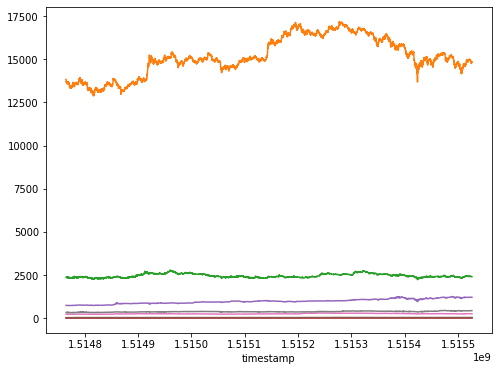

In [362]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8,6))

assets.groupby('Asset_ID').plot(x="timestamp", y="Open", kind="line", ax=ax, legend=False)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

In [363]:
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

labels, time_series = [] , []
for asset, group in assets.groupby("Asset_ID"):
    labels.append(asset)
    time_series.append(group["Open"].array)

# On formatte les séries temporelles
time_series = to_time_series_dataset(time_series)
# On normalise ces mêmes séries
time_series = TimeSeriesScalerMeanVariance().fit_transform(time_series)

time_series.shape

(8, 12690, 1)

In [364]:
from tslearn.clustering import TimeSeriesKMeans
n_classes = 3

model = TimeSeriesKMeans(n_clusters=n_classes, metric="euclidean")
model.fit(time_series)

TimeSeriesKMeans()

In [365]:
TimeSeriesKMeans()

TimeSeriesKMeans()

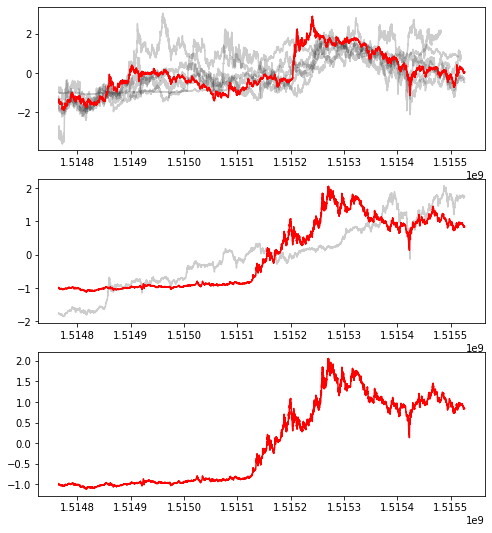

In [366]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(8,n_classes * 3))

# On récupère les dates des différentes observations
time_labels = assets["timestamp"].unique()

# Pour chaque classe
for yi in range(n_classes):
    ax = fig.add_subplot(n_classes, 1, 1 + yi)

    # On sélectionne les séries qui correspondent à cette classe
    for xx in time_series[model.labels_ == yi]:
        ax.plot(time_labels, xx, "k-", alpha=.2)

    # Le barycentre de la classe
    ax.plot(time_labels, model.cluster_centers_[yi].ravel(), "r-")

    # Pour formatter l'heure des observations
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()

This seems not to be working super great. Let us now stack every 100 second on top of each other and see whether we can find similar trends which occur often. 

In [367]:
labels, time_series = [] , []
for asset, group in assets.groupby("Asset_ID"):
    labels.append(asset)
    time_series.append(group["Open"].array)

In [368]:
time_series[1][:100]

<PandasArray>
[         13835.194, 13835.035999999998,            13823.9,
          13802.512,            13766.0, 13717.714000000002,
          13720.922,          13669.246,          13713.412,
           13713.61,          13719.018,          13703.404,
           13690.79, 13688.491999999998,          13702.502,
          13620.185,           13654.02,          13625.404,
 13615.378000000002,          13626.248,           13600.49,
          13606.468, 13610.204000000002,          13599.362,
          13601.328, 13630.963999999998,          13656.364,
          13653.882,          13649.434,           13638.62,
          13640.674,            13656.3,           13669.62,
            13673.2, 13650.721999999998,          13667.614,
          13662.738, 13640.964000000002, 13628.570000000003,
 13649.295999999998,          13641.096, 13635.714000000002,
          13584.805, 13628.795999999998, 13636.329999999998,
 13634.473999999998, 13639.765999999998,           13682.21,
          

In [432]:
minimal_element_length = np.min([len(time_series[i]) for i in range(len(time_series))])

length_interval = 100
tot_nb_intervals = minimal_element_length // length_interval 

labels_segments = []
time_series_segments = []

for i in range(len(time_series)):
    for j in range(tot_nb_intervals):
        labels_segments.append(labels[i] * length_interval + j)
        time_series_segments.append(time_series[i][length_interval*j:length_interval*(j+1)])


In [433]:
# On formatte les séries temporelles
time_series_segments = to_time_series_dataset(time_series_segments)
# On normalise ces mêmes séries
time_series_segments = TimeSeriesScalerMeanVariance().fit_transform(time_series_segments)

time_series_segments.shape

(88, 100, 1)

In [434]:
n_classes = 10

model = TimeSeriesKMeans(n_clusters=n_classes, metric="euclidean")
model.fit(time_series_segments)

TimeSeriesKMeans(n_clusters=10)

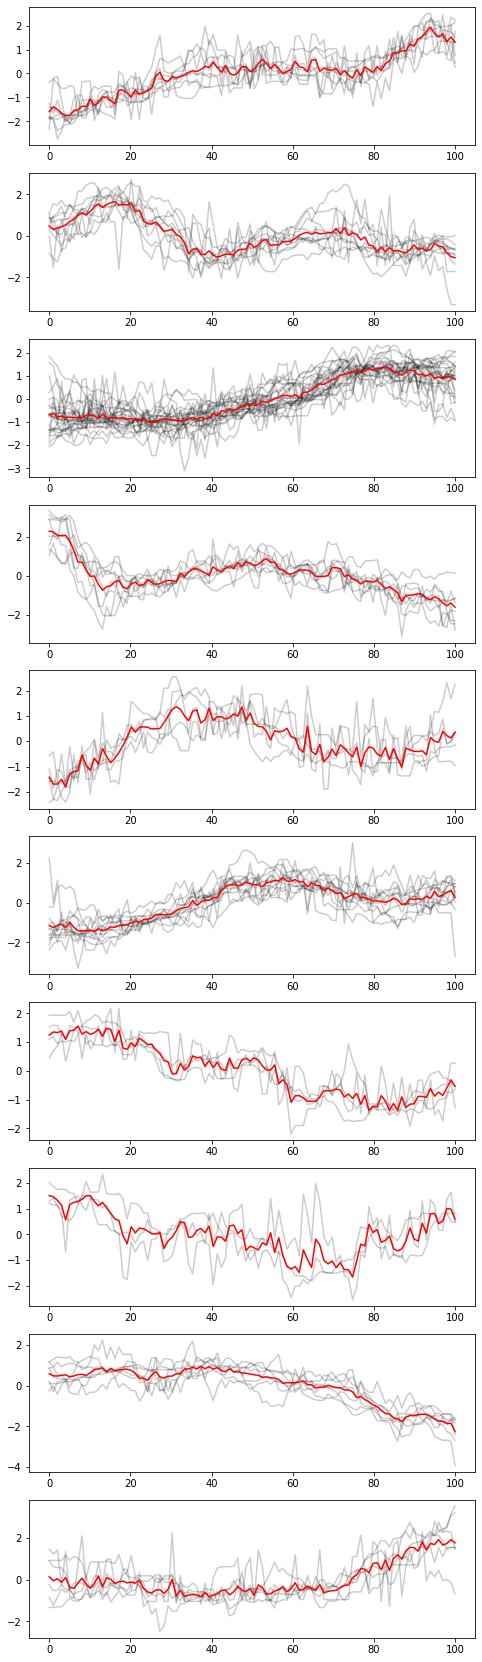

In [435]:
fig = plt.figure(figsize=(8,n_classes * 3))

# On récupère les dates des différentes observations
time_labels = np.linspace(0,100,length_interval)

# Pour chaque classe
for yi in range(n_classes):
    ax = fig.add_subplot(n_classes, 1, 1 + yi)

    # On sélectionne les séries qui correspondent à cette classe
    for xx in time_series_segments[model.labels_ == yi]:
        ax.plot(time_labels, xx, "k-", alpha=.2)

    # Le barycentre de la classe
    ax.plot(time_labels, model.cluster_centers_[yi].ravel(), "r-")

plt.show()

In [436]:
model.cluster_centers_[0].ravel()

array([-1.59780523, -1.38938015, -1.50840711, -1.66547697, -1.75107938,
       -1.76051971, -1.55494918, -1.52500471, -1.3657459 , -1.38625674,
       -1.07639211, -1.33544257, -1.23130147, -0.98492228, -0.99126543,
       -1.14674517, -1.26662158, -0.70472629, -0.69246167, -0.81249878,
       -0.98990863, -0.69254863, -0.87456009, -0.81150093, -0.73057012,
       -0.61206793, -0.12190435,  0.05259514, -0.28489738, -0.33111449,
       -0.12617293, -0.18314533, -0.13210409, -0.05280798,  0.04823597,
        0.11265028,  0.0762111 ,  0.1665673 ,  0.29184177,  0.25357412,
        0.47777922,  0.24489365,  0.05030285,  0.3409787 ,  0.01461465,
       -0.0725763 ,  0.02361191,  0.27960958,  0.28996987,  0.07052848,
        0.1858939 ,  0.42251385,  0.59065424,  0.42123859,  0.20834967,
        0.37188903,  0.19962908, -0.01559195,  0.08572635,  0.16012751,
        0.5061066 ,  0.28015676,  0.24218774,  0.06078588,  0.54715947,
        0.57962327,  0.09283902,  0.21980145,  0.15705083,  0.13

In [437]:
assets_test = df[10000:20000]

In [438]:
assets_test

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
10000,1514842800,7,7.0,30.8360,31.2300,30.4420,30.8605,63.603502,30.853236,-0.009432
10001,1514842800,6,145.0,761.7350,768.9300,757.3700,760.7475,306.739111,760.882116,0.000881
10002,1514842800,9,115.0,228.3340,230.3000,225.8600,228.2860,639.597992,228.308192,-0.004706
10003,1514842800,11,7.0,341.0550,342.8200,339.1000,340.9600,6.944970,341.022472,-0.005194
10004,1514842860,2,40.0,2363.8000,2376.0000,2350.9000,2363.5250,13.704278,2359.811988,-0.002026
...,...,...,...,...,...,...,...,...,...,...
19995,1514918880,5,14.0,8.1857,8.2147,8.1739,8.2000,530.484618,8.201920,-0.004082
19996,1514918880,7,83.0,32.6490,33.2980,31.9440,32.6235,3173.058144,32.627903,-0.015836
19997,1514918880,6,516.0,851.3975,864.5900,840.9200,852.4475,610.361796,852.300280,0.005811
19998,1514918880,9,210.0,248.6975,251.8500,245.2600,249.2100,938.382626,249.240991,-0.004455


In [439]:
labels, time_series = [] , []
for asset, group in assets_test.groupby("Asset_ID"):
    labels.append(asset)
    time_series.append(group["Open"].array)

In [440]:
minimal_element_length = np.min([len(time_series[i]) for i in range(len(time_series))])

tot_nb_intervals = minimal_element_length // length_interval 

labels_segments = []
time_series_segments = []

for i in range(len(time_series)):
    for j in range(tot_nb_intervals):
        labels_segments.append(labels[i] * length_interval + j)
        time_series_segments.append(time_series[i][length_interval*j:length_interval*(j+1)])

# On formatte les séries temporelles
time_series_segments = to_time_series_dataset(time_series_segments)
# On normalise ces mêmes séries
time_series_segments = TimeSeriesScalerMeanVariance().fit_transform(time_series_segments)

time_series_segments.shape

(88, 100, 1)

In [509]:
def correlation(data,family):
    length = length_interval-2
    #print(data[:length].shape)
    ret = np.sum(np.abs(data[:length]-family[:,:length]),axis=1)
    #print(ret.shape)
    return ret / length

def find_best_family(times):
    cors = correlation(times,model.cluster_centers_)
    min_cors = min(cors)
    return np.where(cors==min_cors)[0][0]

def find_inv_cor_family(times):
    cors = correlation(times,model.cluster_centers_)
    return cors**(-1) - 0.5
    
def find_prediction(times,alpha=0.):
    """We take the average of the current value and the prediction
    with a factor of alpha between them"""
    
    indx = find_best_family(times)
    
    pred = alpha * times[length_interval-2] + (1-alpha) * model.cluster_centers_[indx,length_interval-1]
    return pred[0]

def find_prediction_weighted(times):
    """We take the average of the current value and the prediction
    with a factor of alpha between them"""
    
    cors = find_inv_cor_family(times)

    cors /= np.sum(cors)
    
    pred = np.sum(cors * model.cluster_centers_[:,length_interval-1])
    return pred

def compare_last_val_pred(times):
    
    last_val = find_prediction(times,alpha=1)
    family_pred = find_prediction(times,alpha=0)
    mix_pred = find_prediction(times,alpha=0.5)
    weighted_pred = find_prediction_weighted(times)
    
    complement_pred = np.random.normal(last_val,1,1)[0]
    
    #we take a gaussian distribution and only reject values if they 
    #are too close to the predicted values from the families
    while( abs(complement_pred - family_pred) < 1.):
        complement_pred = np.random.normal(last_val,1,1)[0]
        #print(complement_pred)
    
    true_val = times[length_interval-1]
    
    diff_last_val = abs(last_val - true_val)
    diff_family_pred = abs(family_pred - true_val)
    diff_mix = abs(mix_pred - true_val)
    diff_comlement = abs(complement_pred - true_val)
    diff_pred_weighted = abs(weighted_pred - true_val)
    
    
    return diff_last_val,diff_family_pred,diff_mix,diff_comlement,diff_pred_weighted

[[1.31796786]
 [0.24175012]
 [3.21384519]
 [0.31861291]
 [0.3709853 ]
 [0.91464051]
 [0.11245212]
 [0.26405434]
 [0.1524985 ]
 [0.85106037]]


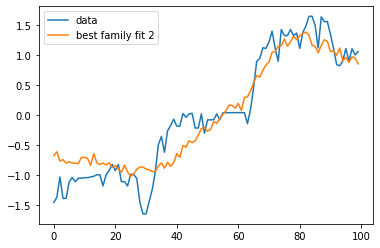

In [510]:
i = 1
plt.plot(time_series_segments[i],label='data')
family_i = find_best_family(time_series_segments[i])
plt.plot(model.cluster_centers_[family_i],label='best family fit {}'.format(family_i))
plt.legend()
print(find_inv_cor_family(time_series_segments[i]))

In [511]:
i = 0
print(find_prediction(time_series_segments[i]))
print(find_prediction_weighted(time_series_segments[i]))

0.27823379358221023
0.4316350989448906


In [512]:
time_series_segments[0][9]

array([-1.57644752])

In [513]:
list_diff = {}
list_diff['last_val'] = []
list_diff['pred_val'] = []
list_diff['mix_val'] = []
list_diff['complement_val'] = []
list_diff['weighted_val'] = []
list_true_val = []

for i in range(len(time_series_segments)):
    diff_last_val,diff_family_pred,mix,compl,w = compare_last_val_pred(time_series_segments[i])
    list_diff['last_val'].append(diff_last_val)
    list_diff['pred_val'].append(diff_family_pred)
    list_diff['mix_val'].append(mix)
    list_diff['complement_val'].append(compl)
    list_diff['weighted_val'].append(w)

last_val 27.389508069062714
pred_val 58.1526573459807
mix_val 39.60934909565777
complement_val 120.3878975211716
weighted_val 72.69195377465407


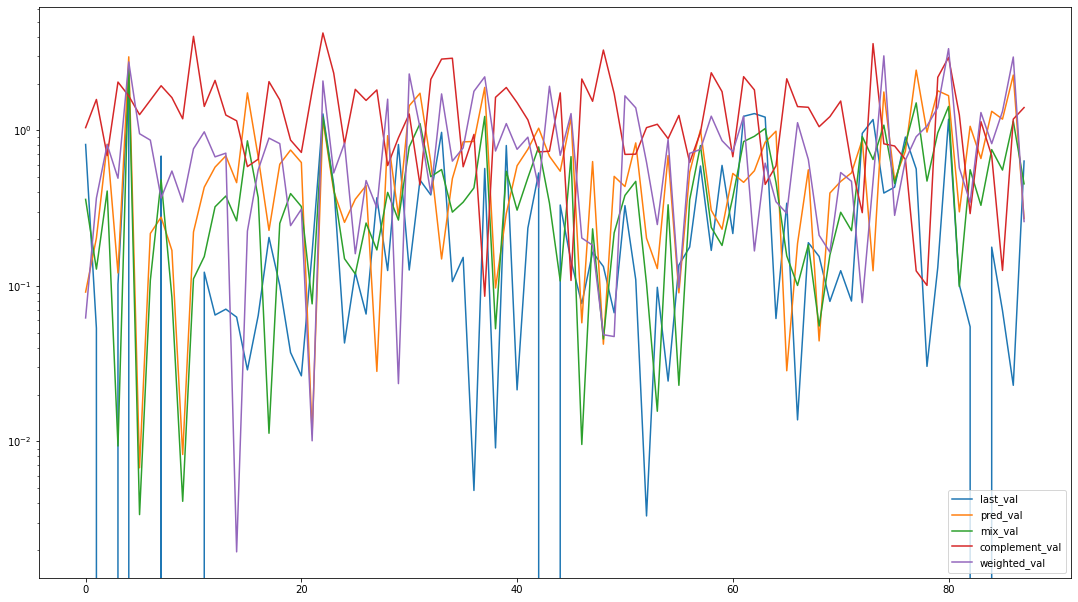

In [515]:
import matplotlib

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

for key in list_diff.keys():
    plt.plot(list_diff[key],label=key)
    plt.yscale('log')
    print(key,np.sum(list_diff[key]))
plt.legend()

(88, 100, 1)


(array([ 6., 16.,  9.,  3.,  9., 19., 21., 17.]),
 array([-2.03775679, -1.60964781, -1.18153884, -0.75342986, -0.32532088,
         0.10278809,  0.53089707,  0.95900604,  1.38711502]),
 <BarContainer object of 8 artists>)

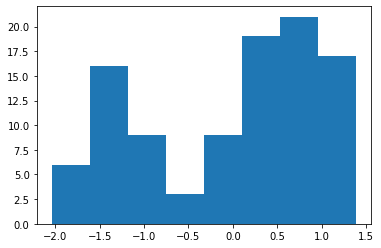

In [473]:
print(time_series_segments.shape)
plt.hist(time_series_segments[0].ravel(),bins='auto')